# 2. Preprocessing

목표1. 텍스트 단위별 요소에 대해 배운다. <br>
목표2. 텍스트 데이터 전처리 기법에 대해 배운다. <br>

## 2.1. 문자 기반 텍스트 표현

#### 문자: 텍스트 분석의 첫 번째 단위

예시 1.1. 문자의 구성: 글자와 구분 기호 <br>

    "My favorite cafe is Starbucks!"

    문자는 글자와 구분 기호로 나뉘어진다. 여기서 문자는 'M", 'c' 등의 알파벳, 구분 기호는 띄어쓰기, '!' 등의 문장부호이다. 

#### 문자 기반 언어 모델 (language model)

- 확률 분포를 이용하여 m개의 단어를 문자 순열로 표현하고 이에 확률을 부여하는 통계 기반 기법 

    _P(w1, ... wm)_

예시 1.2. Suffix array : 문자열의 접미사를 사전식 순서대로 나열한 배열 <br>
https://en.wikipedia.org/wiki/Suffix_array


## 2.2. 단어 기반 텍스트 표현 및 전처리

#### 단어: 의미를 담고있을 확률이 가장 많아서 텍스트 분석에서 가장 많이 쓰이는 단위. 
- 수많은 텍스트 분석 기법들이 단어를 기반으로 고안됨 (품사 태깅, 개체명 인식, 철자 교정 등)

- 영어 vs  한글 
    - 영어의 경우 띄어쓰기 단위로 의미가 분리되는 경우가 대부분이라서 단어 단위로 분석하기에 적합함. 
    - 한국어의 경우 띄어쓰기가 지켜지지 않거나 띄어쓰기 단위로 끊어도 의미가 들어있는 경우가 많아서 어미를 제거하여 어간만 추출한다거나 원형을 복원해야하는 전처리 단계가 많이 필요함.

#### 용어 정의 

- word : 구분된 문자열
- term : normalized된 단어 (대소문자 통일, 형태 복원, 철자 교정 등). word와 동일하게 쓰이기도 함
- token : 유용한 의미적 단위로 함께 모여지는 일련의 문자열. 구분 기호 사이의 글자 시퀀스 
- type : 같은 문자열을 포함하고 있는 모든 token들을 표현하는 클래스 


## 2.2.1. Tokenization

token : 구문 기호 (띄어쓰기, 문장 부호 등)로 구분되는 문자열의 단위 (조각). 단어일 수 있고 아닐 수도 있음. 

tokenization: 문헌 단위의 문자열이 주어졌을 때, token들로 문자열을 조각내는 방법. 구두점, 조사같은 feature 추출에 불필요한 글자들을 제외하는 작업을 일컫음. 

영어의 경우 단어에 조사가 붙지 않아 한글보다 토큰화가 더 쉬움. 

예시 2.1.1. 영어 tokenization <br>

"Hello, my friend. I am here." => "Hello"/"my"/"friend"/"."/"I"/"am"/"here"/"."

예시 2.1.2. 한국어 tokenization <br>

"안녕, 친구야. 나 여기 있어" => "안녕"/","/"친구"/"야"/"나"/"여기"/"있"/"어"/"."


## 2.2.2. Stopwords

불용어: 정보가가 없어 불필요한 단어 

도메인 상관없이 일반적으로 의미없는 단어를 불용어라고 한다. 하지만 각 도메인 별로 의미를 가지는 단어가 다를 수 있기 때문에 다루고자 하는 텍스트의 문맥이나 도메인에 따라 불용어의 기준이 달라질 수 있음. 

예시 2.2.1 domain별 stopwords

   _"주의"_란 단어가 가지는 정보가: 인지심리학 > 화학 <br>
   _"수소"_란 단어가 가지는 정보가: 인지심리학 < 화학


- token화 된 단어가 불용어인지 아닌지 확인 후 제거한다.

    대표적인 불용어는 다음과 같다. 
    

예시 2.2.2. 대표적인 불용어 <br>

영어: the, a, um, you, omg, oh, literally, I, ... etc. <br>
한국어: 없, 있, 그, 저, 이, 좀, 한, ... 등. <br>


#### 주의 <br> 

토큰화를 띄어쓰기 단위로 끊었을 때 발생하는 문제: 
- 하나의 단어, 인용구, 신조어일 경우
- ' . , 등의 구둣점, 쉼표가 필요할 경우: $24.95, 1,000,000.00 등과 같이 값을 표현하는 텍스트가 있을 경우 

예시 2.2.3. 하나의 단어 <br>

"John Smith" => "John"/"Smith"/ 
이름이 John이고 성이 Smith => John과 Smith ?

예시 2.2.4. 축약형 <br>

"It's fine." => "It is fine"
"I'm Korean" => "I am Korean"

- 별도의 단어 사전을 통해 필터링해두거나 규칙을 정한 후 (예: I'm => I am) 분리 또는 결합 등을 통해 추가 전처리가 필요함. 


## 2.2.3. Stemming

- 어근 (stem)만 남겨두고 나머지는 삭제하여 텍스트를 normalize하는 작업.
- 단어의 형태 변화 (시제, 단수/복수 등)에 따라 같은 단어라도 다른 단어처럼 인식될 수 있기 때문. 

예시 2.3.1. stemming

automate/automatic/automation -> automat

computation/computer/computing -> comput

- stemming의 과정

<img src = "https://slideplayer.com/slide/4698162/15/images/5/Porter+s+Stemmer+Porter+Stemming+Algorithm+Complex+suffixes.jpg" width = 500>


- PorterStemmer (포터 어간 추출 알고리즘)이 영어 전처리 과정에 많이 쓰이는 대표적인 알고리즘. http://www.tartarus.org/~martin/PorterStemmer/

예시 2.3.2. 포터 어간 추출 알고리즘 규칙 예. 

-ational -> -ate (rel**ational** -> rel**ate**)
-tional -> tion (computa**tional** -> computa**tion**)
-izer -> ize (digit**izer** -> digit**ize**)
...

- 한국어는 stemming이라는 컨셉이 완벽히 적합하진 않으나, KoNLPy에서 이와 비슷한 형태소 분석을 해줌 https://konlpy-ko.readthedocs.io/ko/v0.4.3/


## 2.2.4. lemmatization

한 단어가 여러 가지 형식으로 표현되어 있는 것을 하나의 단일 형식으로 묶어주는 기법 (Manning and Schutze, 1999)

자연어 처리 기법의 근간이 되는 **형태소 분석**을 통해서 하기 때문에 더 정확한 단어 수준 분석을 수행할 수 있음 

예시 2.4.1. 형태소 종류 : 

1) stem(어간)
: 단어의 의미를 담고있는 단어의 핵심 부분.

2) affix(접사)
: 단어에 추가적인 의미를 주는 부분.

예시 2.4.2. 형태소 분석 종류: 

1) 굴절 형태론 (inflectional morphology) : "cutting" <-> "cut"<br>

2) 파생 형태론 (derivational morphology) : "destruction" <-> "destroy"

예시 2.4.3. lemmatization 예시

am, are, is -> be

car, cars, car's, cars' -> car 

예시 2.4.4. 문장 내에서 lemmatization 예시

"I have memories of visiting the Notre-Dame cathedral."

"I/have/memory/of/visit/the/Notre/Dame/cathedral"


참고자료 : https://ratsgo.github.io/natural%20language%20processing/2017/03/22/lexicon/

## 2.3. 구 기반 텍스트 표현 및 전처리

## 2.3.1. **텍스트 단위화 (Text Chunking)** <br>

    텍스트를 어휘적으로 상호 관련있는 단어들(명사구, 동사구, 형용사구 등)로 나누는 기법
    명사구는 동사의 주체나 목적어가 될 수 있는 요소. 동사구는 조동사, 동사 수식어를 포함.
    
    
## 2.3.2. ** N-gram **

https://en.wikipedia.org/wiki/N-gram

- n-gram is a contiguous sequence of n items from a given sample of text or speech. 주어진 텍스트나 음성으로 연속된 일련의 열


- 여기서 'n'은 사용한 term의 개수를 기준으로 나뉨.
    - uni-gram : 1 terms
    - bi-gram : 2 terms
    - tri-gram : 3 terms

예시 3.2.1 한 문장을 n-gram 수 별로 분해한 모습

<img src = "https://www.oreilly.com/library/view/artificial-intelligence-for/9781788472173/assets/447da4ba-e40a-4787-a2f2-20a906077475.png" witdh = 400>


    

## 2.4. 품사 태깅 (Part-of-speech(POS) tags/tagging)

문장에서 각각의 단어에 해당되는 품사를 레이블로 달아주는 것 (=이름표 달기)

각각의 단어가 어떤 품사로 쓰였는지에 따라 토큰화, 의도 파악이 달라질 수 있기에 텍스트 분석에서 중요하고 필수적인 과정

## 2.4.1. 규칙 기반

- 사전을 사용해서 각각의 단어에 그 단어가 가질 수 있는 품사 리스트를 부여.
- 수작업으로 만든 대량의 규칙을 이용해서 품사의 리스트에서 해당 단어에 맞는 하나의 품사를 선택. 한글 같은 경우 세종 말뭉치가 있음. 세종 말뭉치에는 이런 품사들을 품사별로 사전을 구축한 것이 있음.

## 2.4.2. 기계 학습 기반 

- 각각의 단어의 품사 결정을 해당 단어의 학습 데이터에서 가장 일반적인 품사로 함.
- 히든 마르코프 모델 (hidden markov model: hmm) or conditional random field라는 분류기를 사용. 모든 가능한 태그 순열 중에서 문헌 집단 내에 주어진 단어들의 순열 (observed sequence)에서 가장 가능성이 있는 태그열을 찾음.

### Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
https://www.cis.upenn.edu/~treebank/

```
CC Coordinating conjunction
CD Cardinal number
DT Determiner
EX Existential there
FW Foreign word
IN Preposition or subordinating conjunction
JJ Adjective
JJR Adjective, comparative
JJS Adjective, superlative
LS List item marker
MD Modal
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
PDT Predeterminer
POS Possessive ending
PRP Personal pronoun
PRP$ Possessive pronoun
RB Adverb
RBR Adverb, comparative
RBS Adverb, superlative
RP Particle
SYM Symbol
TO to
UH Interjection
VB Verb, base form
VBD Verb, past tense
VBG Verb, gerund or present participle
VBN Verb, past participle
VBP Verb, non­3rd person singular present
VBZ Verb, 3rd person singular present
WDT Wh­determiner
WP Wh­pronoun
WP$ Possessive wh­pronoun
WRB Wh­adverb
```

----

# 실습 I. 

### 하나의 문장 전처리 해보기

텍스트 전처리 단계에서 중요한 토크나이징에 대해 배웠다. 비정형 텍스트를 토크나이즈를 하는 단계를 실습해보자.

## 1. tokenization

텍스트 전처리과정에서 제일 먼저 수행하는 단계는 토큰화 단계이다. 이 단계에서는 문장을 단어 단위로 잘라낸다. 주로 스페이스를 기준으로 나눈다.

예시 문장. 

**‘Women’s Rights Are Human Rights’** by Hillary Clinton(1995)

In [3]:
hclinton = """If there is one message that echoes forth from this conference, let it be that human rights are women’s rights and women’s rights are human rights once and for all. Let us not forget that among those rights are the right to speak freely — and the right to be heard."""

In [4]:
hclinton

'If there is one message that echoes forth from this conference, let it be that human rights are women’s rights and women’s rights are human rights once and for all. Let us not forget that among those rights are the right to speak freely — and the right to be heard.'

In [5]:
hclinton_tokens = hclinton.split(" ")

## 2. import nltk
http://www.nltk.org/

nltk에서는 tokenization을 포함하여 기본적인 전처리에 필요한 함수를 제공한다. 
기본적인 토큰화 함수는 ```word_tokenize``` 이다.

In [6]:
print(hclinton_tokens)

['If', 'there', 'is', 'one', 'message', 'that', 'echoes', 'forth', 'from', 'this', 'conference,', 'let', 'it', 'be', 'that', 'human', 'rights', 'are', 'women’s', 'rights', 'and', 'women’s', 'rights', 'are', 'human', 'rights', 'once', 'and', 'for', 'all.', 'Let', 'us', 'not', 'forget', 'that', 'among', 'those', 'rights', 'are', 'the', 'right', 'to', 'speak', 'freely', '—', 'and', 'the', 'right', 'to', 'be', 'heard.']


In [7]:
import nltk
from nltk.tokenize import word_tokenize

In [8]:
tokens = nltk.word_tokenize(hclinton)

In [9]:
tokens

['If',
 'there',
 'is',
 'one',
 'message',
 'that',
 'echoes',
 'forth',
 'from',
 'this',
 'conference',
 ',',
 'let',
 'it',
 'be',
 'that',
 'human',
 'rights',
 'are',
 'women',
 '’',
 's',
 'rights',
 'and',
 'women',
 '’',
 's',
 'rights',
 'are',
 'human',
 'rights',
 'once',
 'and',
 'for',
 'all',
 '.',
 'Let',
 'us',
 'not',
 'forget',
 'that',
 'among',
 'those',
 'rights',
 'are',
 'the',
 'right',
 'to',
 'speak',
 'freely',
 '—',
 'and',
 'the',
 'right',
 'to',
 'be',
 'heard',
 '.']

```WordPunctTokenizer```는 구두점도 따로 분리해준다.

In [10]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(hclinton))

['If', 'there', 'is', 'one', 'message', 'that', 'echoes', 'forth', 'from', 'this', 'conference', ',', 'let', 'it', 'be', 'that', 'human', 'rights', 'are', 'women', '’', 's', 'rights', 'and', 'women', '’', 's', 'rights', 'are', 'human', 'rights', 'once', 'and', 'for', 'all', '.', 'Let', 'us', 'not', 'forget', 'that', 'among', 'those', 'rights', 'are', 'the', 'right', 'to', 'speak', 'freely', '—', 'and', 'the', 'right', 'to', 'be', 'heard', '.']


word_tokenize와 WordPunctTokenizer 함수를 썼을 때 어떻게 나오는지 비교해보자

```text = "Don't be fooled by the looks.  Mr. Jake's smile is a fake."```

In [ ]:
#위 예시 문장을 새로 정의해보고 두 토큰화 함수를 써서 결과를 비교해보기 


## 3. POS tagging

In [11]:
from nltk.tag import pos_tag

In [12]:
tagged = nltk.pos_tag(tokens)
tagged

[('If', 'IN'),
 ('there', 'EX'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('message', 'NN'),
 ('that', 'WDT'),
 ('echoes', 'VBZ'),
 ('forth', 'RB'),
 ('from', 'IN'),
 ('this', 'DT'),
 ('conference', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('it', 'PRP'),
 ('be', 'VB'),
 ('that', 'IN'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('are', 'VBP'),
 ('women', 'NNS'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('rights', 'NNS'),
 ('and', 'CC'),
 ('women', 'NNS'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('rights', 'NNS'),
 ('are', 'VBP'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('once', 'RB'),
 ('and', 'CC'),
 ('for', 'IN'),
 ('all', 'DT'),
 ('.', '.'),
 ('Let', 'VB'),
 ('us', 'PRP'),
 ('not', 'RB'),
 ('forget', 'VB'),
 ('that', 'IN'),
 ('among', 'IN'),
 ('those', 'DT'),
 ('rights', 'NNS'),
 ('are', 'VBP'),
 ('the', 'DT'),
 ('right', 'NN'),
 ('to', 'TO'),
 ('speak', 'VB'),
 ('freely', 'RB'),
 ('—', 'JJ'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('right', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('heard', 'VBN'),
 ('.', '.')]

다음 문장을 직접 토큰화 해보자. 그런 후, 토큰화 전과 후를 비교해보자. 

In [ ]:
# 직접 해보기 


In [8]:
# 한글 문장을 nltk로 토큰화 해보자


## 4. Data Cleaning

## 4.1. Stopwords Removal 

nltk에서 불용어 리스트를 제공한다. 

In [13]:
from nltk.corpus import stopwords

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

hclinton_tokens = word_tokenize(hclinton)

hclinton_filter = [word for word in hclinton_tokens if word not in stop_words]

print("First, tokeinze: \n",hclinton_tokens)

print(" ------ ")

print("Next, remove stopwords: \n",hclinton_filter)


First, tokeinze: 
 ['If', 'there', 'is', 'one', 'message', 'that', 'echoes', 'forth', 'from', 'this', 'conference', ',', 'let', 'it', 'be', 'that', 'human', 'rights', 'are', 'women', '’', 's', 'rights', 'and', 'women', '’', 's', 'rights', 'are', 'human', 'rights', 'once', 'and', 'for', 'all', '.', 'Let', 'us', 'not', 'forget', 'that', 'among', 'those', 'rights', 'are', 'the', 'right', 'to', 'speak', 'freely', '—', 'and', 'the', 'right', 'to', 'be', 'heard', '.']
 ------ 
Next, remove stopwords: 
 ['If', 'one', 'message', 'echoes', 'forth', 'conference', ',', 'let', 'human', 'rights', 'women', '’', 'rights', 'women', '’', 'rights', 'human', 'rights', '.', 'Let', 'us', 'forget', 'among', 'rights', 'right', 'speak', 'freely', '—', 'right', 'heard', '.']


## 4.2. Update Stopwords

In [16]:
stop_words.update(".", "-", "s",", ", "us","the","not")

In [17]:
hclinton_filter_update = [word for word in hclinton_tokens if word not in stop_words]
print("This is the 1st version: \n", hclinton_tokens)
print("This is the updated version: \n", hclinton_filter_update)

This is the 1st version: 
 ['If', 'there', 'is', 'one', 'message', 'that', 'echoes', 'forth', 'from', 'this', 'conference', ',', 'let', 'it', 'be', 'that', 'human', 'rights', 'are', 'women', '’', 's', 'rights', 'and', 'women', '’', 's', 'rights', 'are', 'human', 'rights', 'once', 'and', 'for', 'all', '.', 'Let', 'us', 'not', 'forget', 'that', 'among', 'those', 'rights', 'are', 'the', 'right', 'to', 'speak', 'freely', '—', 'and', 'the', 'right', 'to', 'be', 'heard', '.']
This is the updated version: 
 ['If', 'one', 'message', 'echoes', 'forth', 'conference', 'let', 'human', 'rights', 'women', '’', 'rights', 'women', '’', 'rights', 'human', 'rights', 'Let', 'us', 'forget', 'among', 'rights', 'right', 'speak', 'freely', '—', 'right', 'heard']


하지만 매번 이렇게 규칙을 정해주는 것은 불편할 뿐더러 데이터의 양이 방대해질 수록 불가능할 수도 있다. 텍스트를 정규화(Normalize)한 후에 불용어 처리를 하는 것을 권장한다. 

## 4.3. normalizatoin (정규화)

정규화는 서로 다르게 표현되었으나 의미는 같은 단어들을 통일해주는 작업이다. 
- 대소문자 통합
- 어근 추출 (lemmatization, stemming) 

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

frank_text = """
Six years have passed since I resolved on my present undertaking.
I can, even now, remember the hour from which I dedicated myself to
this great enterprise.  I commenced by inuring my body to hardship.
I accompanied the whale-fishers on several expeditions to the North Sea;
I voluntarily endured cold, famine, thirst, and want of sleep;
I often worked harder than the common sailors during the day and devoted
my nights to the study of mathematics, the theory of medicine,
and those branches of physical science from which a naval
adventurer might derive the greatest practical advantage.
"""

In [19]:
frank_text_lower = frank_text.lower()
print(frank_text_lower)


six years have passed since i resolved on my present undertaking.
i can, even now, remember the hour from which i dedicated myself to
this great enterprise.  i commenced by inuring my body to hardship.
i accompanied the whale-fishers on several expeditions to the north sea;
i voluntarily endured cold, famine, thirst, and want of sleep;
i often worked harder than the common sailors during the day and devoted
my nights to the study of mathematics, the theory of medicine,
and those branches of physical science from which a naval
adventurer might derive the greatest practical advantage.



In [20]:
stop_words = set(stopwords.words('english'))
frank_text_lower_tokens = word_tokenize(frank_text_lower)
print(frank_text_lower_tokens)

['six', 'years', 'have', 'passed', 'since', 'i', 'resolved', 'on', 'my', 'present', 'undertaking', '.', 'i', 'can', ',', 'even', 'now', ',', 'remember', 'the', 'hour', 'from', 'which', 'i', 'dedicated', 'myself', 'to', 'this', 'great', 'enterprise', '.', 'i', 'commenced', 'by', 'inuring', 'my', 'body', 'to', 'hardship', '.', 'i', 'accompanied', 'the', 'whale-fishers', 'on', 'several', 'expeditions', 'to', 'the', 'north', 'sea', ';', 'i', 'voluntarily', 'endured', 'cold', ',', 'famine', ',', 'thirst', ',', 'and', 'want', 'of', 'sleep', ';', 'i', 'often', 'worked', 'harder', 'than', 'the', 'common', 'sailors', 'during', 'the', 'day', 'and', 'devoted', 'my', 'nights', 'to', 'the', 'study', 'of', 'mathematics', ',', 'the', 'theory', 'of', 'medicine', ',', 'and', 'those', 'branches', 'of', 'physical', 'science', 'from', 'which', 'a', 'naval', 'adventurer', 'might', 'derive', 'the', 'greatest', 'practical', 'advantage', '.']


In [21]:
filtered_lower_tokens = [word for word in frank_text_lower_tokens 
                         if word not in stop_words]
print(filtered_lower_tokens)

['six', 'years', 'passed', 'since', 'resolved', 'present', 'undertaking', '.', ',', 'even', ',', 'remember', 'hour', 'dedicated', 'great', 'enterprise', '.', 'commenced', 'inuring', 'body', 'hardship', '.', 'accompanied', 'whale-fishers', 'several', 'expeditions', 'north', 'sea', ';', 'voluntarily', 'endured', 'cold', ',', 'famine', ',', 'thirst', ',', 'want', 'sleep', ';', 'often', 'worked', 'harder', 'common', 'sailors', 'day', 'devoted', 'nights', 'study', 'mathematics', ',', 'theory', 'medicine', ',', 'branches', 'physical', 'science', 'naval', 'adventurer', 'might', 'derive', 'greatest', 'practical', 'advantage', '.']


## 4.4. lemmatization
dies, watched, has 등은 각각 dies, watch, have라는 기본형으로부터 파생된 단어이다. 

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/yoon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
words = ['died', 'watched', 'had']
[lemma.lemmatize(w, 'v') for w in words] # 이들 단어가 동사로 쓰였다는 사실을 알려주기 위해 'v' 옵션추가

['die', 'watch', 'have']

In [33]:
lemma.lemmatize('runs', 'v') #또는 단어에 개별적으로 추가할 수 있음 

'run'

## 4.5. stemming

In [27]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stem = PorterStemmer()
words = ['died', 'watched', 'had']
[stem.stem(w) for w in words]

['die', 'watch', 'had']

## 실습 II. 
### 문헌 전처리 해보기 : Gutenberg corpus


<img src = "http://cityofsafetyharbor.com/images/pages/N641/projectgutenberg1.jpg" witdh = 200/>
Project Gutenberg : 
1. https://www.gutenberg.org/
2. https://en.wikipedia.org/wiki/Project_Gutenberg


## 1. Load Data 

In [2]:
#실습 
from nltk.corpus import gutenberg
gutenberg_files = gutenberg.fileids()
gutenberg_files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
#gutenberg 문헌 중 이상한 나라의 앨리스를 불러와서 전처리해보자. 
gutenberg_doc = gutenberg.open('carroll-alice.txt').read()

#확인 
gutenberg_doc

'[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\nit al

## 2. Tokenization

In [5]:
#tokenization
alice_tokens = nltk.word_tokenize(gutenberg_doc)

In [ ]:
#확인해보기
alice_tokens

In [8]:
#POS tagging
alice_tag = nltk.pos_tag(alice_tokens)

In [9]:
#확인해보기
alice_tag

[('[', 'JJ'),
 ('Alice', 'NNP'),
 ("'s", 'POS'),
 ('Adventures', 'NNS'),
 ('in', 'IN'),
 ('Wonderland', 'NNP'),
 ('by', 'IN'),
 ('Lewis', 'NNP'),
 ('Carroll', 'NNP'),
 ('1865', 'CD'),
 (']', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('I', 'PRP'),
 ('.', '.'),
 ('Down', 'RP'),
 ('the', 'DT'),
 ('Rabbit-Hole', 'JJ'),
 ('Alice', 'NNP'),
 ('was', 'VBD'),
 ('beginning', 'VBG'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('very', 'RB'),
 ('tired', 'JJ'),
 ('of', 'IN'),
 ('sitting', 'VBG'),
 ('by', 'IN'),
 ('her', 'PRP$'),
 ('sister', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('bank', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('of', 'IN'),
 ('having', 'VBG'),
 ('nothing', 'NN'),
 ('to', 'TO'),
 ('do', 'VB'),
 (':', ':'),
 ('once', 'RB'),
 ('or', 'CC'),
 ('twice', 'VB'),
 ('she', 'PRP'),
 ('had', 'VBD'),
 ('peeped', 'VBN'),
 ('into', 'IN'),
 ('the', 'DT'),
 ('book', 'NN'),
 ('her', 'PRP$'),
 ('sister', 'NN'),
 ('was', 'VBD'),
 ('reading', 'VBG'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('had', 'VBD'),
 ('no', 'DT'),
 

## 3. Stemming (or lemmatizing) the Words

Lemmatizaiton을 사용할지 여부는 다루고자 하는 텍스트의 특성과 얼마나 엄격히 원형 복원이 이루어져야하는 지에 대한 기준에 따라 다르다. 

두 기법을 사용한 결과를 비교해보자. 

참고: http://stackoverflow.com/questions/17317418/stemmers-vs-lemmatizers

In [28]:
porter_stemmer.stem('speaking')

'speak'

In [29]:
lemma.lemmatize('speaking')

'speaking'

In [32]:
porter_stemmer.stem('spoken')

'spoken'

In [33]:
lemma.lemmatize('spoken')

'spoken'

## 3.a. Lemmatization

In [11]:
#nltk의 wordnet.WordNetLemmatizer를 사용한다.
lemma = nltk.wordnet.WordNetLemmatizer()

#lemmatization을 할 문헌을 정의한 후 변수를 생성해준다. 
alice_lemma = []
for token in alice_tokens: 
    alice_lemma.append(lemma.lemmatize(token))

In [12]:
#확인해보기
alice_lemma

['[',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'wa',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'wa',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'picture',
 'or',
 'conversation',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'Alice',
 "'without",
 'picture',
 'or',
 'conversation',
 '?',
 "'",
 'So',
 'she',
 'wa',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'a',
 'well',
 'a',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 ')',
 ',',
 'whether',
 'the',
 'pleasure',
 'of',
 'ma

In [14]:
#다시 한번 POS tagging을 해준다
alice_lemma_tag = nltk.pos_tag(alice_lemma)

In [15]:
#확인해보기
alice_lemma_tag

[('[', 'JJ'),
 ('Alice', 'NNP'),
 ("'s", 'POS'),
 ('Adventures', 'NNS'),
 ('in', 'IN'),
 ('Wonderland', 'NNP'),
 ('by', 'IN'),
 ('Lewis', 'NNP'),
 ('Carroll', 'NNP'),
 ('1865', 'CD'),
 (']', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('I', 'PRP'),
 ('.', '.'),
 ('Down', 'RP'),
 ('the', 'DT'),
 ('Rabbit-Hole', 'JJ'),
 ('Alice', 'NNP'),
 ('wa', 'NN'),
 ('beginning', 'VBG'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('very', 'RB'),
 ('tired', 'JJ'),
 ('of', 'IN'),
 ('sitting', 'VBG'),
 ('by', 'IN'),
 ('her', 'PRP$'),
 ('sister', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('bank', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('of', 'IN'),
 ('having', 'VBG'),
 ('nothing', 'NN'),
 ('to', 'TO'),
 ('do', 'VB'),
 (':', ':'),
 ('once', 'RB'),
 ('or', 'CC'),
 ('twice', 'VB'),
 ('she', 'PRP'),
 ('had', 'VBD'),
 ('peeped', 'VBN'),
 ('into', 'IN'),
 ('the', 'DT'),
 ('book', 'NN'),
 ('her', 'PRP$'),
 ('sister', 'JJ'),
 ('wa', 'NN'),
 ('reading', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('had', 'VBD'),
 ('no', 'DT'),
 ('pic

## 3.b. Stemming

In [16]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

alice_stem = []

for token in alice_tokens:
    alice_stem.append(porter_stemmer.stem(token))


In [17]:
alice_stem

['[',
 'alic',
 "'s",
 'adventur',
 'in',
 'wonderland',
 'by',
 'lewi',
 'carrol',
 '1865',
 ']',
 'chapter',
 'I',
 '.',
 'down',
 'the',
 'rabbit-hol',
 'alic',
 'wa',
 'begin',
 'to',
 'get',
 'veri',
 'tire',
 'of',
 'sit',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'have',
 'noth',
 'to',
 'do',
 ':',
 'onc',
 'or',
 'twice',
 'she',
 'had',
 'peep',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'wa',
 'read',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictur',
 'or',
 'convers',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'alic',
 "'without",
 'pictur',
 'or',
 'convers',
 '?',
 "'",
 'So',
 'she',
 'wa',
 'consid',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'veri',
 'sleepi',
 'and',
 'stupid',
 ')',
 ',',
 'whether',
 'the',
 'pleasur',
 'of',
 'make',
 'a',
 'daisy-chain',
 'would',
 'be',


In [18]:
#다시 한번 POS tagging을 해준다
alice_stem_tag = nltk.pos_tag(alice_stem)

In [19]:
alice_stem_tag

[('[', 'NNP'),
 ('alic', 'NN'),
 ("'s", 'POS'),
 ('adventur', 'NN'),
 ('in', 'IN'),
 ('wonderland', 'NN'),
 ('by', 'IN'),
 ('lewi', 'NN'),
 ('carrol', 'NN'),
 ('1865', 'CD'),
 (']', 'NNP'),
 ('chapter', 'NN'),
 ('I', 'PRP'),
 ('.', '.'),
 ('down', 'RP'),
 ('the', 'DT'),
 ('rabbit-hol', 'JJ'),
 ('alic', 'JJ'),
 ('wa', 'NN'),
 ('begin', 'NN'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('veri', 'JJ'),
 ('tire', 'NN'),
 ('of', 'IN'),
 ('sit', 'NN'),
 ('by', 'IN'),
 ('her', 'PRP$'),
 ('sister', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('bank', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('of', 'IN'),
 ('have', 'VBP'),
 ('noth', 'DT'),
 ('to', 'TO'),
 ('do', 'VB'),
 (':', ':'),
 ('onc', 'VB'),
 ('or', 'CC'),
 ('twice', 'VB'),
 ('she', 'PRP'),
 ('had', 'VBD'),
 ('peep', 'VBN'),
 ('into', 'IN'),
 ('the', 'DT'),
 ('book', 'NN'),
 ('her', 'PRP$'),
 ('sister', 'JJ'),
 ('wa', 'NN'),
 ('read', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('had', 'VBD'),
 ('no', 'DT'),
 ('pictur', 'NN'),
 ('or', 'CC'),
 ('conv

### 단어수를 기반으로 가장 많이 사용된 순서로 정렬해보기
참고) https://docs.python.org/3/library/collections.html#collections.Counter.most_common

In [34]:
#파이썬 내장함수 Counter를 사용
from collections import Counter

In [38]:
alice_lemma_count = Counter(alice_lemma)

most = alice_lemma_count.most_common()
most

[(',', 2418),
 ('the', 1516),
 ("'", 1127),
 ('.', 975),
 ('a', 854),
 ('and', 757),
 ('to', 717),
 ('it', 568),
 ('she', 506),
 ('of', 496),
 ('said', 456),
 ('!', 450),
 ('Alice', 394),
 ('I', 364),
 ('wa', 361),
 ('in', 352),
 ('you', 334),
 ('that', 267),
 ('--', 264),
 ('her', 243),
 (':', 233),
 ("n't", 203),
 ('?', 202),
 ('at', 200),
 (';', 194),
 ("'s", 188),
 ('on', 187),
 ('had', 183),
 ('with', 175),
 ('all', 171),
 ("'I", 169),
 ('be', 145),
 ('for', 134),
 ('not', 128),
 ('very', 126),
 ('little', 125),
 ('they', 123),
 ('so', 121),
 ('do', 114),
 ('but', 114),
 ('out', 112),
 ('this', 112),
 ('is', 104),
 ('down', 99),
 ('he', 98),
 ('up', 96),
 ('about', 94),
 ('one', 94),
 ('The', 93),
 ('his', 93),
 ('what', 90),
 ('know', 89),
 ('them', 88),
 ('were', 86),
 ('like', 85),
 ('went', 83),
 ('again', 83),
 ('herself', 83),
 ('could', 82),
 ('would', 82),
 ('have', 80),
 ('thing', 79),
 ('thought', 76),
 ('did', 74),
 ('Queen', 74),
 ('then', 72),
 ("''", 72),
 ('or', 71)

### 시각화하여 Zipf's law와 비교해보기

### Zipf's Law

<img src = "https://i.ytimg.com/vi/KvOS2MdKFwE/maxresdefault.jpg">
<img src = "https://i1.wp.com/www.watzthis.com/wp-content/uploads/2015/10/zipfgraph.png">
    

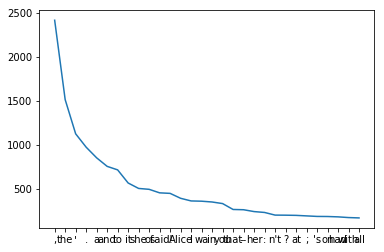

In [62]:
x = [x[0] for x in most]
x = x[:30]
y = [y[1] for y in most]
y = y[:30]
plt.plot(x,y)
plt.show()

## 4. 불용어 제거 및 추가하기

In [63]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [67]:
#가장 많이 나오는 30개의 단어를 뽑아보자. 
x = x[:30]
x

[',',
 'the',
 "'",
 '.',
 'a',
 'and',
 'to',
 'it',
 'she',
 'of',
 'said',
 '!',
 'Alice',
 'I',
 'wa',
 'in',
 'you',
 'that',
 '--',
 'her',
 ':',
 "n't",
 '?',
 'at',
 ';',
 "'s",
 'on',
 'had',
 'with',
 'all']

In [68]:
stop_words = set(x)
stop_words

{'!',
 "'",
 "'s",
 ',',
 '--',
 '.',
 ':',
 ';',
 '?',
 'Alice',
 'I',
 'a',
 'all',
 'and',
 'at',
 'had',
 'her',
 'in',
 'it',
 "n't",
 'of',
 'on',
 'said',
 'she',
 'that',
 'the',
 'to',
 'wa',
 'with',
 'you'}

In [69]:
#stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])
alice_remove = [word for word in alice_lemma if word.lower() not in stop_words]
alice_remove # i와 I는 다르게 처리된다. 맨 앞에서 .lower() 를 사용하여 모두 소문자로 변환시키면 문제를 해결할 수 있다. lower 시킨 단어가 불용어 리스트에 있는지 없는지만 확인후 코퍼스 내용은그대로 출력해준다.

['[',
 'Alice',
 'Adventures',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 'Down',
 'Rabbit-Hole',
 'Alice',
 'beginning',
 'get',
 'very',
 'tired',
 'sitting',
 'by',
 'sister',
 'bank',
 'having',
 'nothing',
 'do',
 'once',
 'or',
 'twice',
 'peeped',
 'into',
 'book',
 'sister',
 'reading',
 'but',
 'no',
 'picture',
 'or',
 'conversation',
 "'and",
 'what',
 'is',
 'use',
 'book',
 'thought',
 'Alice',
 "'without",
 'picture',
 'or',
 'conversation',
 'So',
 'considering',
 'own',
 'mind',
 '(',
 'well',
 'could',
 'for',
 'hot',
 'day',
 'made',
 'feel',
 'very',
 'sleepy',
 'stupid',
 ')',
 'whether',
 'pleasure',
 'making',
 'daisy-chain',
 'would',
 'be',
 'worth',
 'trouble',
 'getting',
 'up',
 'picking',
 'daisy',
 'when',
 'suddenly',
 'White',
 'Rabbit',
 'pink',
 'eye',
 'ran',
 'close',
 'by',
 'There',
 'nothing',
 'so',
 'VERY',
 'remarkable',
 'nor',
 'did',
 'Alice',
 'think',
 'so',
 'VERY',
 'much',
 'out',
 'way',
 'hear',
 'Rab

In [92]:
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])
alice_remove = [word for word in alice_lemma if word.lower() not in stop_words]
alice_remove # i와 I는 다르게 처리된다. 맨 앞에서 .lower() 를 사용하여 모두 소문자로 변환시키면 문제를 해결할 수 있다. lower 시킨 단어가 불용어 리스트에 있는지 없는지만 확인후 코퍼스 내용은그대로 출력해준다.

['Alice',
 'Adventures',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 'CHAPTER',
 'I',
 'Down',
 'Rabbit-Hole',
 'Alice',
 'beginning',
 'get',
 'very',
 'tired',
 'sitting',
 'by',
 'sister',
 'bank',
 'having',
 'nothing',
 'do',
 'once',
 'or',
 'twice',
 'peeped',
 'into',
 'book',
 'sister',
 'reading',
 'but',
 'no',
 'picture',
 'or',
 'conversation',
 "'and",
 'what',
 'is',
 'use',
 'book',
 'thought',
 'Alice',
 "'without",
 'picture',
 'or',
 'conversation',
 'So',
 'considering',
 'own',
 'mind',
 'well',
 'could',
 'for',
 'hot',
 'day',
 'made',
 'feel',
 'very',
 'sleepy',
 'stupid',
 'whether',
 'pleasure',
 'making',
 'daisy-chain',
 'would',
 'be',
 'worth',
 'trouble',
 'getting',
 'up',
 'picking',
 'daisy',
 'when',
 'suddenly',
 'White',
 'Rabbit',
 'pink',
 'eye',
 'ran',
 'close',
 'by',
 'There',
 'nothing',
 'so',
 'VERY',
 'remarkable',
 'nor',
 'did',
 'Alice',
 'think',
 'so',
 'VERY',
 'much',
 'out',
 'way',
 'hear',
 'Rabbit',
 'say',
 'itself',

## 5. (선택) 정보가가 있는 단어만 추출하기: 명사 추출

정보가가 있는 단어는 문헌의 종류마다 다를 수 있다. 예를 들어 감정 분석의 경우 형용사나 부사, 채팅 용어를 분석하는 경우 축약어, 신조어 ("lol", "ㅋㅋㅋ")이 정보가를 가질 수 있다. 

명사만 추출하여 확인해보자

In [93]:
#먼저 단어와 태그가 같이 잘 매칭되어있는지 확인
alice_lemma_nouns = set()
for word, tagger in alice_lemma_tag:
    print(word,tagger)
    break #책 한 권을 담고있는 내용이라 list가 너무 많아서 일단 브레이크해서 뭐가 출력되는지 확인해보자

[ JJ


In [94]:
#명사구 NN, NNS만 추출
alice_lemma_nouns = set()
for word, tagger in alice_lemma_tag:
    if tagger in ['NN','NNS']: #nn과 nns만 단어에 추가하기
        alice_lemma_nouns.add(word)

In [95]:
#확인해보기
print(alice_lemma_nouns)

{'wider', 'lock', 'right', 'wherever', 'dog', 'daughter', 'grin', 'attends', 'conquest', 'letter', 'breeze', 'undertone', 'speed', 'character', 'delight', 'result', 'riddles.', 'meaning', 'care', 'man', 'rumbling', 'bag', 'wish', 'sneeze', 'sense', 'buttercup', 'matter', 'rock', 'day-school', 'writing-desks', 'scale', 'centre', 'cattle', 'walrus', 'taller', 'notice', 'fond', 'better', "'I", 'please', "'Oh", "'Yes", 'one', 'evidence', "'besides", 'looking-glass', 'pleasure', 'pet', 'blade', 'argument', 'languid', 'timid', 'sentence', 'pound', 'back', 'throat', 'pie-crust', 'wait', 'dismay', 'fight', 'help', 'YOURS', 'clamour', 'promise', 'wandering', 'cardboard', 'peg', 'nonsense', 'adventure', 'alarm', 'lady', 'singer', 'rattle', 'lullaby', '_I_', 'sky', 'forepaw', 'go', 'grass', "'Mine", "'One", "'VE", 'ha', "'they'd", 'dinn', 'edge', 'beauti', 'sister', 'sing', 'stick', 'tell', 'respect', 'fetch', "'Off", 'fall', 'canvas', 'choking', 'fire', 'passion', 'tea', 'waving', 'watch', 'posi

In [96]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/AppleGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

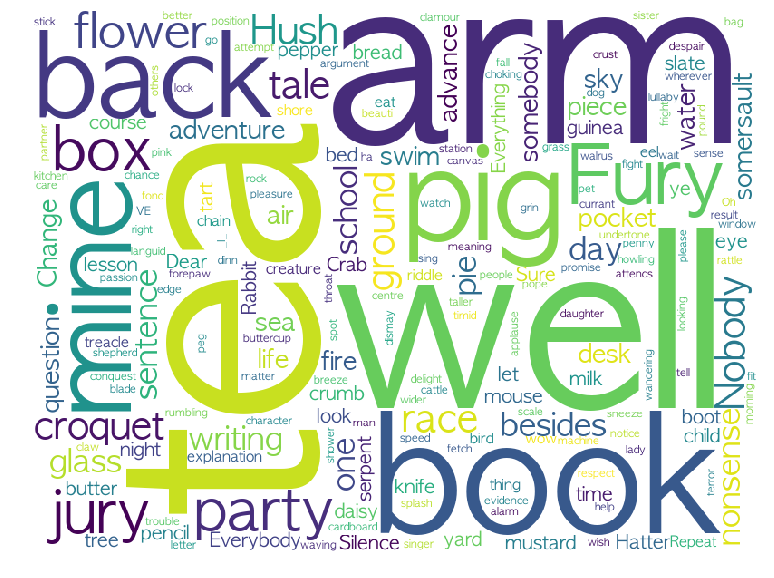

CPU times: user 2.17 s, sys: 227 ms, total: 2.4 s
Wall time: 2.4 s


In [100]:
%time displayWordCloud(' '.join(alice_lemma_nouns))

## 연습

<img src = "https://i.ebayimg.com/images/g/B08AAOSwQ59ZYo3w/s-l300.jpg" width = 200>

oliversacks.txt는 뇌과학자 Oliver Sacks의 <The man who mistook is wife for a hat>에서 발췌한 내용을 담은 텍스트 파일이다. 파일을 불러와 전처리 (토큰화, 불용어 제거, 스테밍)해보고 불용어를 확인 후, 명사만 추출하여 wordcloud를 만들어보자. 